In [ ]:
import fiftyone as fo

# Delete the existing dataset
if fo.dataset_exists("circle-pond-2"):
    fo.delete_dataset("circle-pond-2")

# Now create your new dataset
dataset = fo.Dataset("circle-pond-2")

In [ ]:
import fiftyone as fo
import os
import glob

# Set the dataset name
name = "circle-pond-2"

# Set the dataset directory
dataset_dir = r"C:\Users\gbo10\OneDrive\measurement_paper_images\detection drone\runs-detections-drone-14.08\circle-pond-2"

# The splits to load
splits = ["test", "val"]

# Create or load the dataset
if fo.dataset_exists(name):
    dataset = fo.load_dataset(name)
    print(f"Loaded existing dataset '{name}'")
else:
    dataset = fo.Dataset(name)
    print(f"Created new dataset '{name}'")

def read_yolo_label(label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()
    detections = []
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        detections.append(
            fo.Detection(
                label=str(int(class_id)),  # Convert class_id to string
                bounding_box=[x_center - width/2, y_center - height/2, width, height]
            )
        )
    return detections

for split in splits:
    split_dir = os.path.join(dataset_dir, split)
    images_dir = os.path.join(split_dir, "images")
    labels_dir = os.path.join(split_dir, "labels")
    
    # Add images and labels
    for image_path in glob.glob(os.path.join(images_dir, "*")):
        image_name = os.path.basename(image_path)
        label_name = os.path.splitext(image_name)[0] + ".txt"
        label_path = os.path.join(labels_dir, label_name)
        
        sample = fo.Sample(filepath=image_path)
        sample.tags.append(split)
        
        if os.path.exists(label_path):
            detections = read_yolo_label(label_path)
            sample["ground_truth"] = fo.Detections(detections=detections)
        
        dataset.add_sample(sample)
        print(f"Added {image_name} with label (if exists)")

print(f"\nDataset '{name}' now has {len(dataset)} samples")

# Print detailed information about the dataset
print("\nDataset Summary:")
print(dataset.summary())

# Print schema of the dataset
print("\nDataset Schema:")
for field_name, field_type in dataset.get_field_schema().items():
    print(f"{field_name}: {field_type}")

# If you want to examine a specific sample
if len(dataset) > 0:
    sample = dataset.first()
    print("\nFirst Sample Details:")
    print(sample)

    if "ground_truth" in sample:
        print("\nGround Truth for First Sample:")
        print(sample.ground_truth)
    else:
        print("\nWarning: 'ground_truth' field not found in the first sample")
else:
    print("\nWarning: Dataset is empty")

# Optionally, you can visualize the dataset
# session = fo.launch_app(dataset)
# session.wait()


In [69]:

data_path = Path(r"C:/Users/gbo10/OneDrive/measurement_paper_images/current from roboflow -28.8-first sens/1280 drone circle/data.yaml")
print(data_path)

C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sens\1280 drone circle\data.yaml


In [ ]:
session = fo.launch_app(dataset)

In [70]:
from ultralytics import RTDETR


model= RTDETR(r"C:\Users\gbo10\OneDrive\measurement_paper_images\weights- 28.08\rtdetr 1280.pt")
from pathlib import Path

data_path = Path(r"C:\Users\gbo10\Videos\data.yaml")
metrics = model.val(save_json=True, data=str(data_path), plots=True, split='test')


Ultralytics YOLOv8.2.73  Python-3.9.7 torch-2.1.2+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
rt-detr-l summary: 506 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs


val: Scanning C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\1280 drone circle\test\labels... 79 images, 1 backgrounds, 0 corrupt: 100%|██████████| 79/79 [00:00<00:00, 575.55it/s]

val: New cache created: C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\1280 drone circle\test\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [01:49<07:19, 109.90s/it]c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\utils\plotting.py:1022: RuntimeWarning:

invalid value encountered in cast

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [06:55<00:00, 83.12s/it] 

                   all         79        560          0          0          0          0


Speed: 15.4ms preprocess, 5166.8ms inference, 0.1ms loss, 3.8ms postprocess per image
Saving c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\detect\val11\predictions.json...
Results saved to c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\detect\val11


In [ ]:
from ultralytics import RTDETR


model= RTDETR(r"C:\Users\gbo10\OneDrive\measurement_paper_images\detection drone\runs-detections-drone-14.08\detect\train\weights\best.pt")



dataset.view().apply_model(model, label_field="RTDETR")



In [ ]:
import fiftyone as fo
import os

# Load your FiftyOne dataset


# Define the mapping between local folders and their corresponding tags
path_to_tag_map = {
    r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/20.9\natural": "natural",
    r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/20.9\light plus flash": "light+", 
         r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater dron/20.9\with dark": "dark",  # Add more mappings as needed
 # Add more mappings as needed
}

# Create a dictionary to map base filenames to tags
filename_to_tag = {}

for folder_path, tag in path_to_tag_map.items():
    for root, _, files in os.walk(folder_path):
        for filename in files:
            # Extract the base filename (without extension)
            base_filename = os.path.splitext(filename)[0]
            filename_to_tag[base_filename] = tag

# Iterate through each sample in the FiftyOne dataset
for sample in dataset:
    # Extract the base filename from the sample's filepath
    sample_filename = os.path.basename(sample.filepath)

    # Find the common part of the filename (e.g., "20230920_121147")
    common_part = "_".join(sample_filename.split("_")[:2])  # Adjust the splitting logic if needed

    # Check if the common part exists in our filename_to_tag map
    if common_part in filename_to_tag:
        # Get the corresponding tag
        tag = filename_to_tag[common_part]

        # Append the tag to the sample and save it
        sample.tags.append(tag)
        sample.save()
        print(f"Tagged {sample.filepath} with '{tag}'")

print("Tagging complete!")


In [ ]:
sample = dataset.first()
print(sample.ground_truth.detections[0])

In [60]:
from ultralytics import YOLO

model = YOLO(r'C:\Users\gbo10\OneDrive\measurement_paper_images\weights- 28.08\drone_yolov8l.pt')

model.val(save_json=True, data=r"C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\counting\data.yaml", plots=True,split='test')

Ultralytics YOLOv8.2.73  Python-3.9.7 torch-2.1.2+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
Model summary (fused): 268 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\counting\test\labels.cache... 79 images, 1 backgrounds, 0 corrupt: 100%|██████████| 79/79 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [02:01<00:00, 24.25s/it]


                   all         79        552      0.839      0.688      0.754      0.261
Speed: 5.3ms preprocess, 1491.7ms inference, 0.0ms loss, 6.9ms postprocess per image
Saving c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\detect\val3\predictions.json...
Results saved to c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\detect\val3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000259AB7E1C70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

# counting analysis final

In [4]:
from fiftyone.utils.yolo import YOLOv5DatasetImporter

import fiftyone as fo

importer = YOLOv5DatasetImporter(
    dataset_dir=r"C:\Users\gbo10\OneDrive\measurement_paper_images/960540-circle",
    split="test"
)

dataset = fo.Dataset.from_importer(importer, name="counting-2",overwrite=True)

 100% |███████████████████| 79/79 [1.1s elapsed, 0s remaining, 69.7 samples/s]         


In [21]:
dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.YOLOv5Dataset,
    dataset_dir=r"C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\counting",
    split="test"
)

 100% |███████████████████| 79/79 [568.0ms elapsed, 0s remaining, 140.6 samples/s]      


In [36]:
import fiftyone as fo

dataset = fo.Dataset.from_dir(overwrite=True,
    dataset_type=fo.types.COCODetectionDataset,dataset_dir=r"C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\New folder",label_field="ground_truth",name="counting-2")
    

 100% |███████████████████| 79/79 [612.4ms elapsed, 0s remaining, 129.0 samples/s]      


In [5]:
session = fo.launch_app(dataset)


Could not connect session, trying again in 10 seconds



RuntimeError: Client is not connected

In [127]:
from ultralytics import RTDETR

model = RTDETR(r"C:\Users\gbo10\OneDrive\measurement_paper_images\weights- 28.08\RT_DETR 8 .pt")

dataset.apply_model(model, label_field="predictions")   

   0% |/------------------|  0/78 [5.8s elapsed, ? remaining, ? samples/s]   


KeyboardInterrupt: 

In [7]:
import fiftyone as fo

import os


light_plus_flash_folder = r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/20.9 - Copy\light plus flash"
natural_folder = r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/20.9 - Copy\natural"
dark_and_flash_folder = r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/20.9 - Copy\with dark and flash"

# Function to extract the prefix from the filenames
def get_prefix(filename):
    return filename.split('_jpg')[0] if '_jpg' in filename else filename.split('.')[0]

# Function to tag based on folder

def tag_images_from_folder(folder_path, tag_name):
    filenames = [get_prefix(f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    for filename_prefix in filenames:
        for sample in dataset:  
            if filename_prefix in sample.filepath:
                        
                        sample.tags.append(tag_name)
                        sample.save()

# Tag images
tag_images_from_folder(light_plus_flash_folder, "cieling_light_plus_flash")
tag_images_from_folder(natural_folder, "cieling_light_only")
tag_images_from_folder(dark_and_flash_folder, "no_cieling_light")

# Verify tagging
for tag in ["cieling_light_plus_flash", "cieling_light_only", "no_cieling_light"]:
    view = dataset.match_tags(tag)
    print(f"Images tagged with {tag}: {len(view)}")

Images tagged with cieling_light_plus_flash: 13
Images tagged with cieling_light_only: 38
Images tagged with no_cieling_light: 28


In [ ]:


model=YOLO(r"C:\Users\gbo10\OneDrive\measurement_paper_images/960540-circle\content\runs\detect\train4\weights\best.pt")

# Apply the model to the dataset
dataset.apply_model(model, label_field="predictions")

In [17]:
import fiftyone as fo
import fiftyone.zoo as foz
from fiftyone import ViewField as F
import fiftyone.core.plots as fop
import numpy as np
from ultralytics import YOLO
from tqdm import tqdm

def count_accuracy(dataset, pred_field, gt_field, threshold):
    view = dataset.select_fields([pred_field, gt_field])
    accuracies = []
    
    for sample in view:
        gt_count = len(sample[gt_field].detections)
        pred_count = len([d for d in sample[pred_field].detections if d.confidence > threshold])
        
        if gt_count == 0:
            accuracy = 1.0 if pred_count == 0 else 0.0
        else:
            accuracy = max(0, 1 - abs(pred_count - gt_count) / gt_count)
        
        accuracies.append(accuracy)
    
    return sum(accuracies) / len(accuracies)

#counting MAE accuracy
def count_MAE_accuracy(dataset, pred_field, gt_field, threshold):
    view = dataset.select_fields([pred_field, gt_field])
    accuracies = []
    
    for sample in view:
        gt_count = len(sample[gt_field].detections)
        pred_count = len([d for d in sample[pred_field].detections if d.confidence > threshold])
        
        accuracy = abs(pred_count - gt_count)
        
        accuracies.append(accuracy)
    
    return sum(accuracies) / len(accuracies)



#counting MARE accuracy
def count_MARE_accuracy(dataset, pred_field, gt_field, threshold):
    view = dataset.select_fields([pred_field, gt_field])
    accuracies = []
    
    for sample in view:
        gt_count = len(sample[gt_field].detections)
        pred_count = len([d for d in sample[pred_field].detections if d.confidence > threshold])
        if(gt_count>0):
            accuracy = abs(pred_count - gt_count) / gt_count
            
            accuracies.append(accuracy)
    
    return sum(accuracies) / len(accuracies)





# Generate data points for the graph
thresholds = np.arange(0, 0.75, 0.05)
accuracies = [count_accuracy(dataset, "predictions", "ground_truth", t) for t in tqdm(thresholds)]
MAE_accuracies = [count_MAE_accuracy(dataset, "predictions", "ground_truth", t) for t in tqdm(thresholds)]
MARE_accuracies = [count_MARE_accuracy(dataset, "predictions", "ground_truth", t) for t in tqdm(thresholds)]


#print the best threshold
print("Best threshold:", thresholds[np.argmax(accuracies)], "with accuracy:", np.max(accuracies))
print("Best threshold for MAE:", thresholds[np.argmin(MAE_accuracies)], "with accuracy:", np.min(MAE_accuracies))
print("Best threshold for MARE:", thresholds[np.argmin(MARE_accuracies)], "with accuracy:", np.min(MARE_accuracies))

#in plotly
import plotly.express as px
for accuracy in [accuracies, MAE_accuracies, MARE_accuracies]:
    accuracy_name= "Counting Accuracy" if accuracy==accuracies else "Counting MAE Accuracy" if accuracy==MAE_accuracies else "Counting MARE Accuracy"
    fig = px.line(x=thresholds, y=accuracies, labels={"x": "Confidence Threshold", "y": f'{accuracy_name}'}, title=f"Counting {accuracy_name} vs Confidence Threshold")
    fig.show()





# print("FiftyOne App launched. The plot is available in the App's plots panel.")
# print("You can interact with the dataset and the plot in the App.")
# print("Press Ctrl+C in this terminal when you're done to close the App.")

# # Keep the script running
# session.wait()


100%|██████████| 15/15 [00:03<00:00,  3.96it/s]

Best threshold: 0.30000000000000004 with accuracy: 0.819665341875535
Best threshold for MAE: 0.30000000000000004 with accuracy: 1.2151898734177216
Best threshold for MARE: 0.30000000000000004 with accuracy: 0.18264664092093236


In [20]:
for accuracy in [accuracies, MAE_accuracies, MARE_accuracies]:
    accuracy_name= "Counting Accuracy" if accuracy==accuracies else "Counting MAE Accuracy" if accuracy==MAE_accuracies else "Counting MARE Accuracy"
    plot = fop.lines(
        x=thresholds,
        y=accuracy,
        labels=f"{accuracy_name}",
        title=f"Counting {accuracy_name} vs Confidence Threshold",
        xaxis_title="Confidence Threshold",
        yaxis_title=f"{accuracy_name}"
    )
    #attach the plot to the dataset

    session.plots.attach(plot)
    plot.show()

FigureWidget({
    'data': [{'hovertemplate': 'Confidence Threshold: %{x}<br>Counting Accuracy: %{y}<extra></extra>',
              'line': {'color': '#FF6D04'},
              'mode': 'lines+markers',
              'name': 'Counting Accuracy',
              'showlegend': True,
              'type': 'scatter',
              'uid': '06a17466-fc64-43e9-9988-82e950162507',
              'x': array([          0,        0.05,         0.1,        0.15,         0.2,
                                 0.25,         0.3,        0.35,         0.4,        0.45,
                                  0.5,        0.55,         0.6,        0.65,         0.7]),
              'y': array([    0.79514,     0.79514,     0.79514,     0.79514,     0.79514,
                              0.79514,     0.81967,     0.81815,     0.80178,     0.78663,
                              0.72362,     0.61942,     0.38502,     0.14546,    0.029983])}],
    'layout': {'margin': {'b': 0, 'l': 0, 'r': 0, 't': 30},
               '

FigureWidget({
    'data': [{'hovertemplate': 'Confidence Threshold: %{x}<br>Counting MAE Accuracy: %{y}<extra></extra>',
              'line': {'color': '#FF6D04'},
              'mode': 'lines+markers',
              'name': 'Counting MAE Accuracy',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'c771fb29-eb8a-4af3-8642-42a5ecba5db5',
              'x': array([          0,        0.05,         0.1,        0.15,         0.2,
                                 0.25,         0.3,        0.35,         0.4,        0.45,
                                  0.5,        0.55,         0.6,        0.65,         0.7]),
              'y': array([     1.2405,      1.2405,      1.2405,      1.2405,      1.2405,
                               1.2405,      1.2152,      1.3165,      1.5316,      1.8101,
                               2.2911,      3.0759,      4.5696,      6.1266,      6.9114])}],
    'layout': {'margin': {'b': 0, 'l': 0, 'r': 0, 't': 30},
        

FigureWidget({
    'data': [{'hovertemplate': 'Confidence Threshold: %{x}<br>Counting MARE Accuracy: %{y}<extra></extra>',
              'line': {'color': '#FF6D04'},
              'mode': 'lines+markers',
              'name': 'Counting MARE Accuracy',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'af0ed459-8ca9-4940-97a7-dfe918f3f6a1',
              'x': array([          0,        0.05,         0.1,        0.15,         0.2,
                                 0.25,         0.3,        0.35,         0.4,        0.45,
                                  0.5,        0.55,         0.6,        0.65,         0.7]),
              'y': array([     0.2203,      0.2203,      0.2203,      0.2203,      0.2203,
                               0.2203,     0.18265,     0.18418,     0.20076,     0.21611,
                              0.27992,     0.38545,     0.62286,     0.86549,     0.98245])}],
    'layout': {'margin': {'b': 0, 'l': 0, 'r': 0, 't': 30},
      

In [ ]:
def count_accuracy_by_tag(dataset, pred_field, gt_field, threshold, tag):
    view = dataset.match(F("tags").contains(tag))
    accuracies = []
    
    for sample in view:
        gt_count = len(sample[gt_field].detections)
        pred_count = len([d for d in sample[pred_field].detections if d.confidence > threshold])
        
        if gt_count == 0:
            accuracy = 1.0 if pred_count == 0 else 0.0
        else:
            accuracy = max(0, 1 - abs(pred_count - gt_count) / gt_count)
        
        accuracies.append(accuracy)
    
    return sum(accuracies) / len(accuracies) if accuracies else 0

def count_MAE_accuracy_by_tag(dataset, pred_field, gt_field, threshold, tag):
    view = dataset.match(F("tags").contains(tag))
    accuracies = []
    
    for sample in view:
        gt_count = len(sample[gt_field].detections)
        pred_count = len([d for d in sample[pred_field].detections if d.confidence > threshold])
        
        accuracy = abs(pred_count - gt_count)
        
        accuracies.append(accuracy)
    
    return sum(accuracies) / len(accuracies) if accuracies else 0

def count_MARE_accuracy_by_tag(dataset, pred_field, gt_field, threshold, tag):
    view = dataset.match(F("tags").contains(tag))
    accuracies = []
    
    for sample in view:
        gt_count = len(sample[gt_field].detections)
        pred_count = len([d for d in sample[pred_field].detections if d.confidence > threshold])
        if(gt_count>0):
            accuracy = abs(pred_count - gt_count) / gt_count
            
            accuracies.append(accuracy)
    
    return sum(accuracies) / len(accuracies) if accuracies else 0

# Get the sample tags
tags = dataset.distinct("tags")

tag_accuracies = {tag: [count_accuracy_by_tag(dataset, "predictions", "ground_truth", t, tag) for t in thresholds] for tag in tags}
tag_MAE_accuracies = {tag: [count_MAE_accuracy_by_tag(dataset, "predictions", "ground_truth", t, tag) for t in thresholds] for tag in tags}
tag_MARE_accuracies = {tag: [count_MARE_accuracy_by_tag(dataset, "predictions", "ground_truth", t, tag) for t in thresholds] for tag in tags}

# Print the accuracies for each tag
for tag in tags:
    print(f"Tag: {tag}")
    print("Accuracy:", tag_accuracies[tag])
    print("MAE Accuracy:", tag_MAE_accuracies[tag])
    print("MARE Accuracy:", tag_MARE_accuracies[tag])
    print()

# Plot the accuracies for each tag
for tag in tags:
    for accuracy in [tag_accuracies[tag], tag_MAE_accuracies[tag], tag_MARE_accuracies[tag]]:
        accuracy_name= "Counting Accuracy" if accuracy==tag_accuracies[tag] else "Counting MAE Accuracy" if accuracy==tag_MAE_accuracies[tag] else "Counting MARE Accuracy"
        plot = fop.lines(
            x=thresholds,
            y=accuracy,
            labels=f"{accuracy_name}",
            title=f"Counting {accuracy_name} vs Confidence Threshold for Tag '{tag}'",
            xaxis_title="Confidence Threshold",
            yaxis_title=f"{accuracy_name}"
        )
        #attach the plot to the dataset

        session.plots.attach(plot)
        plot.show()

In [46]:
dataset.get_field_schema()

OrderedDict([('id', <fiftyone.core.fields.ObjectIdField at 0x2402ac11970>),
             ('filepath', <fiftyone.core.fields.StringField at 0x2402abd57f0>),
             ('tags', <fiftyone.core.fields.ListField at 0x2402abd5370>),
             ('metadata',
              <fiftyone.core.fields.EmbeddedDocumentField at 0x2402abd5310>),
             ('ground_truth_detections',
              <fiftyone.core.fields.EmbeddedDocumentField at 0x2402abd5f40>),
             ('predictions',
              <fiftyone.core.fields.EmbeddedDocumentField at 0x2402abdfe50>)])

In [ ]:
import matplotlib.pyplot as plt

def plot_histogram(dataset, field, bins=10):
    # Compute the histogram
    counts, bin_edges = dataset.histogram(field, bins=bins)

    # Plot the histogram
    plt.bar(bin_edges[:-1], counts, width=bin_edges[1] - bin_edges[0])

    # Add labels
    plt.xlabel(field)
    plt.ylabel("Count")
    plt.title(f"{field} Histogram")

    plt.show()

plot_histogram(dataset, "ground_truth.detections.length", bins=10)

In [36]:
import fiftyone as fo
from fiftyone import ViewField as F

# Query for samples with at least 5 false positives
query = F("eval_fp").length() == 5

try:
    # Get the view of samples matching the query
    view = dataset.match(query)

    # Print the filenames and false positive counts
    for sample in view:
        fp_count = sample.eval_fp
        print(f"Filename: {sample.filepath}, False Positives: {fp_count}")

except Exception as e:
    print(f"An error occurred: {str(e)}")
    
    # If the above fails, try a different approach
    print("Attempting alternative method...")
    
    for sample in dataset:
        if hasattr(sample, 'eval_fp'):
            fp_count = sample.eval_fp
            if fp_count >= 5:
                print(f"Filename: {sample.filepath}, False Positives: {fp_count}")

An error occurred: PlanExecutor error during aggregation :: caused by :: The argument to $size must be an array, but was of type: int, full error: {'ok': 0.0, 'errmsg': 'PlanExecutor error during aggregation :: caused by :: The argument to $size must be an array, but was of type: int', 'code': 17124, 'codeName': 'Location17124'}
Attempting alternative method...
Filename: C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\counting\test\images\20230920_115133_jpg.rf.9ca3cc133f857c148ddca6fc5f372b26.jpg, False Positives: 8
Filename: C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\counting\test\images\20230920_120348_jpg.rf.fb3348f231412c13e4d0656aa94c266e.jpg, False Positives: 6
Filename: C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\counting\test\images\20230920_120705_jpg.rf.c17776c4ccf0f62425d24f5d5ced0a13.jpg, False Positives: 6
Filename: C:\Users\gbo10\OneDrive\me

In [44]:
dataset.get_field_schema()

OrderedDict([('id', <fiftyone.core.fields.ObjectIdField at 0x2402ac11970>),
             ('filepath', <fiftyone.core.fields.StringField at 0x2402abd57f0>),
             ('tags', <fiftyone.core.fields.ListField at 0x2402abd5370>),
             ('metadata',
              <fiftyone.core.fields.EmbeddedDocumentField at 0x2402abd5310>),
             ('ground_truth_detections',
              <fiftyone.core.fields.EmbeddedDocumentField at 0x2402abd5f40>),
             ('predictions',
              <fiftyone.core.fields.EmbeddedDocumentField at 0x2402abdfe50>)])

In [49]:
for sample in dataset:
    print(sample.ground_truth_detections)

<Detections: {
    'detections': [
        <Detection: {
            'id': '66d9f8ba4ba0e662c8d4404a',
            'attributes': {},
            'tags': [],
            'label': 'prawn',
            'bounding_box': [0.334375, 0.2640625, 0.15234375, 0.1515625],
            'mask': None,
            'confidence': None,
            'index': None,
            'supercategory': 'prawn',
            'iscrowd': 0,
        }>,
        <Detection: {
            'id': '66d9f8ba4ba0e662c8d4404b',
            'attributes': {},
            'tags': [],
            'label': 'prawn',
            'bounding_box': [0.2953125, 0.2546875, 0.04921875, 0.04921875],
            'mask': None,
            'confidence': None,
            'index': None,
            'supercategory': 'prawn',
            'iscrowd': 0,
        }>,
        <Detection: {
            'id': '66d9f8ba4ba0e662c8d4404c',
            'attributes': {},
            'tags': [],
            'label': 'prawn',
            'bounding_box': [0.6, 0.4

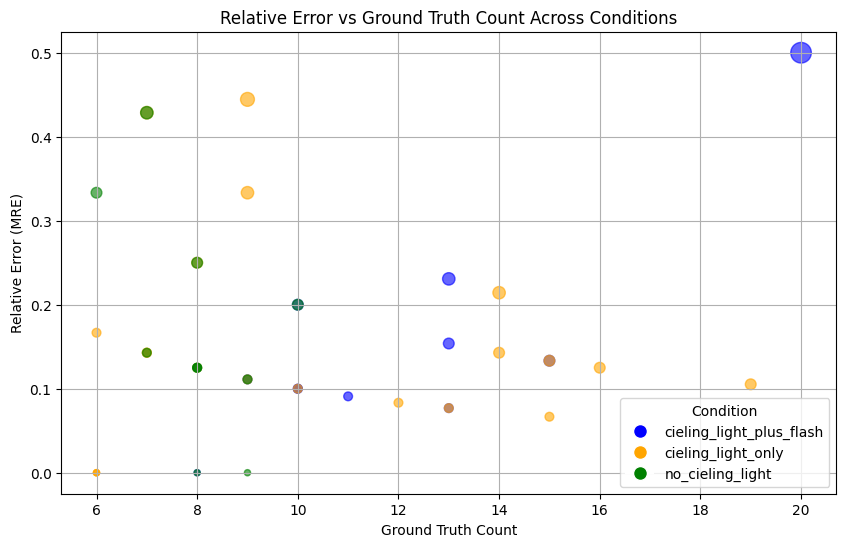

In [128]:
import matplotlib.pyplot as plt

# Conditions and corresponding colors
conditions = ["cieling_light_plus_flash", "cieling_light_only", "no_cieling_light"]
colors = {'cieling_light_plus_flash': 'blue', 'cieling_light_only': 'orange', 'no_cieling_light': 'green'}

# Lists to store values for plotting
ground_truth_counts = []
relative_errors = []
absolute_errors = []
condition_labels = []

for condition in conditions:
    view = dataset.match_tags(condition)
    
    for sample in view:
        gt_count = len(sample.ground_truth.detections)
        if gt_count > 5:    
            # Check if ground_truth_detections is not None before accessing detections
           
                
            
            pred_count = len(sample.predictions.detections)
            abs_error = abs(pred_count - gt_count)
            
            # Calculate relative error (avoid division by zero)
            if gt_count > 0:
                rel_error = abs_error / gt_count
            else:
                rel_error = 0
            
            ground_truth_counts.append(gt_count)
            relative_errors.append(rel_error)
            absolute_errors.append(abs_error)
            condition_labels.append(condition)

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(ground_truth_counts, relative_errors, 
                      c=[colors[label] for label in condition_labels], 
                      s=[(ae + 1) * 20 for ae in absolute_errors],  # Scale the size for visibility
                      alpha=0.6)

plt.xlabel('Ground Truth Count')
plt.ylabel('Relative Error (MRE)')
plt.title('Relative Error vs Ground Truth Count Across Conditions')

# Create a legend with colors representing conditions
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', 
                               markerfacecolor=color, markersize=10) 
                    for label, color in colors.items()], 
           labels=conditions, title="Condition")

plt.grid(True)
plt.show()


In [ ]:
results.plot_pr_curves()

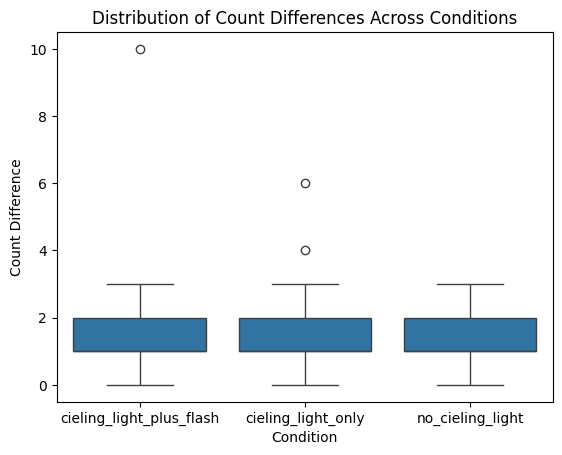

In [119]:
import seaborn as sns
import pandas as pd
count_diffs = []

for condition in conditions:
    view = dataset.match_tags(condition)
    for sample in view:
        pred_count = len(sample.predictions.detections)
        gt_count = len(sample.ground_truth.detections)
        
        
        count_diffs.append({"Condition": condition, "Count Difference":abs( pred_count - gt_count)})

df = pd.DataFrame(count_diffs)

# Create a box plot using Seaborn
sns.boxplot(x="Condition", y="Count Difference", data=df)
plt.title("Distribution of Count Differences Across Conditions")
plt.show()


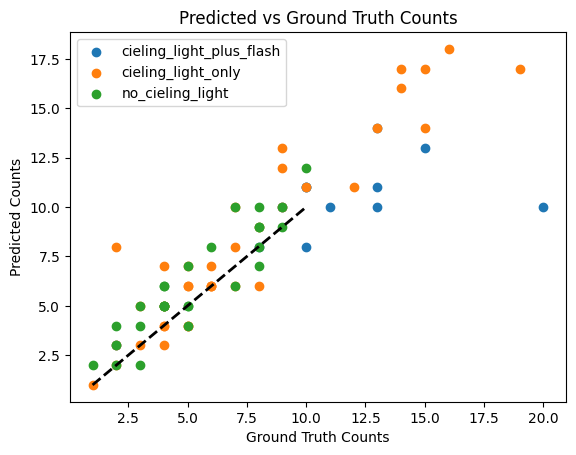

In [120]:
import matplotlib.pyplot as plt

# Conditions and corresponding colors
conditions = ["cieling_light_plus_flash", "cieling_light_only", "no_cieling_light"]

for condition in conditions:
    view = dataset.match_tags(condition)
    gt_counts = []
    pred_counts = []

    for sample in view:
        # Append ground truth count if ground truth detections exist
        gt_count = len(sample.ground_truth.detections)
        

        gt_counts.append(gt_count)  # Append ground truth count
        pred_counts.append(len(sample.predictions.detections))  # Append predicted count

    # Scatter plot for this condition
    plt.scatter(gt_counts, pred_counts, label=condition)

# Plot y=x line for reference
plt.plot([min(gt_counts), max(gt_counts)], [min(gt_counts), max(gt_counts)], 'k--', lw=2)

# Labels and title
plt.xlabel('Ground Truth Counts')
plt.ylabel('Predicted Counts')
plt.title('Predicted vs Ground Truth Counts')
plt.legend()
plt.show()


In [129]:
for sample in dataset:
    gt_count = len(sample.ground_truth.detections)
    pred_count = len(sample.predictions.detections)
    
    # Calculate the difference (overprediction if positive)
    sample["count_diff"] = abs(pred_count - gt_count)
    sample.save()

# Step 2: Launch FiftyOne app with dynamic filtering via slider


In [130]:
for sample in dataset:
    gt_count = len(sample.ground_truth.detections)
    pred_count = len(sample.predictions.detections)
    
    # Calculate the difference (overprediction if positive)
    sample['MRE']=abs(pred_count - gt_count)/gt_count
    sample.save()
    

In [123]:
session = fo.launch_app(dataset)

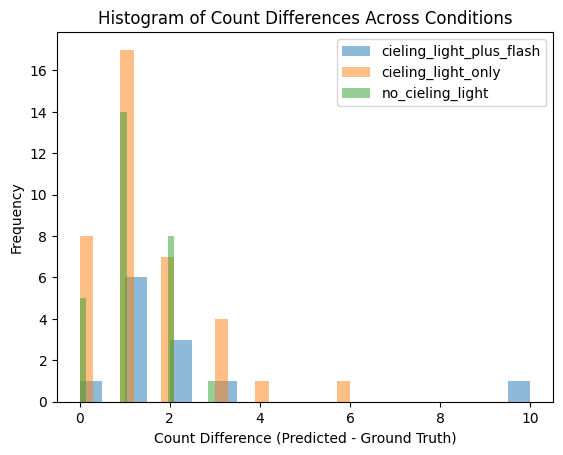

In [122]:
for condition in conditions:
    view = dataset.match_tags(condition)
    count_diffs = []

    for sample in view:
        pred_count = len(sample.predictions.detections)

        
        gt_count = len(sample.ground_truth.detections)
       

            
        
        count_diffs.append(abs(pred_count - gt_count))
    
    plt.hist(count_diffs, bins=20, alpha=0.5, label=condition)

plt.xlabel('Count Difference (Predicted - Ground Truth)')
plt.ylabel('Frequency')
plt.title('Histogram of Count Differences Across Conditions')
plt.legend()
plt.show()


In [126]:
from scipy import stats

# Function to compute count differences for each condition
def get_filtered_counts(view, field, threshold=6):
    # Filter counts where ground truth count > threshold
    counts = []
    for sample in view:
       

        gt_count = len(sample["ground_truth"].detections)
        

        
        if gt_count > threshold:
            counts.append(len(sample[field].detections))
        

    return counts

# Conditions
conditions = ["cieling_light_plus_flash", "cieling_light_only", "no_cieling_light"]

# Iterate through each condition to compute statistics and test significance
for condition in conditions:
    view = dataset.match_tags(condition)
    
    

    # Get filtered ground truth and prediction counts where ground truth count > 6
    ground_truth_counts = get_filtered_counts(view, "ground_truth")
    prediction_counts = get_filtered_counts(view, "predictions")

    # Ensure there are counts left after filtering
    if len(ground_truth_counts) == 0 or len(prediction_counts) == 0:
        print(f"\nSkipping {condition} as no samples have ground truth counts > 6")
        continue

    # Shapiro-Wilk test for normality
    print(f"\nNormality test for {condition}:")
    stat_gt, p_gt = stats.shapiro(ground_truth_counts)
    stat_pred, p_pred = stats.shapiro(prediction_counts)
    
    print(f"  Ground truth normality p-value: {p_gt}")
    print(f"  Predictions normality p-value: {p_pred}")

    # Paired t-test if data is normally distributed
    if p_gt > 0.05 and p_pred > 0.05:
        print(f"\nRunning paired t-test for {condition}:")
        t_stat, t_p_value = stats.ttest_rel(ground_truth_counts, prediction_counts)
        print(f"  T-statistic: {t_stat}, P-value: {t_p_value}")

        if t_p_value > 0.05:
            print(f"The difference is NOT statistically significant for {condition} (p > 0.05)")
        else:
            print(f"The difference IS statistically significant for {condition} (p <= 0.05)")
    else:
        # Wilcoxon signed-rank test if data is not normally distributed
        print(f"\nRunning Wilcoxon signed-rank test for {condition}:")
        w_stat, w_p_value = stats.wilcoxon(ground_truth_counts, prediction_counts)
        print(f"  W-statistic: {w_stat}, P-value: {w_p_value}")

        if w_p_value > 0.05:
            print(f"The difference is NOT statistically significant for {condition} (p > 0.05)")
        else:
            print(f"The difference IS statistically significant for {condition} (p <= 0.05)")




Normality test for cieling_light_plus_flash:
  Ground truth normality p-value: 0.10981249064207077
  Predictions normality p-value: 0.24265237152576447

Running paired t-test for cieling_light_plus_flash:
  T-statistic: 1.5051533894137556, P-value: 0.1631983327462786
The difference is NOT statistically significant for cieling_light_plus_flash (p > 0.05)

Normality test for cieling_light_only:
  Ground truth normality p-value: 0.09942509979009628
  Predictions normality p-value: 0.3441392481327057

Running paired t-test for cieling_light_only:
  T-statistic: -2.2443344307471285, P-value: 0.03930588763859531
The difference IS statistically significant for cieling_light_only (p <= 0.05)

Normality test for no_cieling_light:
  Ground truth normality p-value: 0.14879806339740753
  Predictions normality p-value: 0.7173653841018677

Running paired t-test for no_cieling_light:
  T-statistic: -1.9215378456610457, P-value: 0.08684229054535088
The difference is NOT statistically significant for 

In [82]:
import numpy as np

def compute_statistics(view, detections):
    counts = [len(sample[detections].detections) for sample in view]
    total_count = np.sum(counts)
    mean_count = np.mean(counts)
    median_count = np.median(counts)
    std_dev_count = np.std(counts)
    min_count = np.min(counts)
    max_count = np.max(counts)

    return {
        "total_count": total_count,
        "mean_count": mean_count,
        "median_count": median_count,
        "std_dev_count": std_dev_count,
        "min_count": min_count,
        "max_count": max_count,
    }

# Conditions
conditions = ["cieling_light_plus_flash", "cieling_light_only", "no_cieling_light"]

# Compute statistics for each condition
for condition in conditions:
    view = dataset.match_tags(condition)

    # Compute statistics for ground truths
    ground_truth_stats = compute_statistics(view, "ground_truth")
    print(f"\nGround Truth Statistics for {condition}:")
    for key, value in ground_truth_stats.items():
        print(f"{key}: {value}")

    # Compute statistics for predictions
    prediction_stats = compute_statistics(view, "predictions")
    print(f"\nPrediction Statistics for {condition}:")
    for key, value in prediction_stats.items():
        print(f"{key}: {value}")




Ground Truth Statistics for cieling_light_plus_flash:
total_count: 132
mean_count: 11.0
median_count: 10.5
std_dev_count: 3.8078865529319543
min_count: 2
max_count: 18

Prediction Statistics for cieling_light_plus_flash:
total_count: 119
mean_count: 9.916666666666666
median_count: 10.0
std_dev_count: 2.6601482832520613
min_count: 3
max_count: 14

Ground Truth Statistics for cieling_light_only:
total_count: 273
mean_count: 7.184210526315789
median_count: 6.0
std_dev_count: 4.291087846111647
min_count: 1
max_count: 19

Prediction Statistics for cieling_light_only:
total_count: 311
mean_count: 8.18421052631579
median_count: 6.5
std_dev_count: 4.667103593844759
min_count: 1
max_count: 18

Ground Truth Statistics for no_cieling_light:
total_count: 147
mean_count: 5.25
median_count: 4.5
std_dev_count: 2.473069232466295
min_count: 1
max_count: 10

Prediction Statistics for no_cieling_light:
total_count: 173
mean_count: 6.178571428571429
median_count: 5.5
std_dev_count: 2.6464743585782657
min

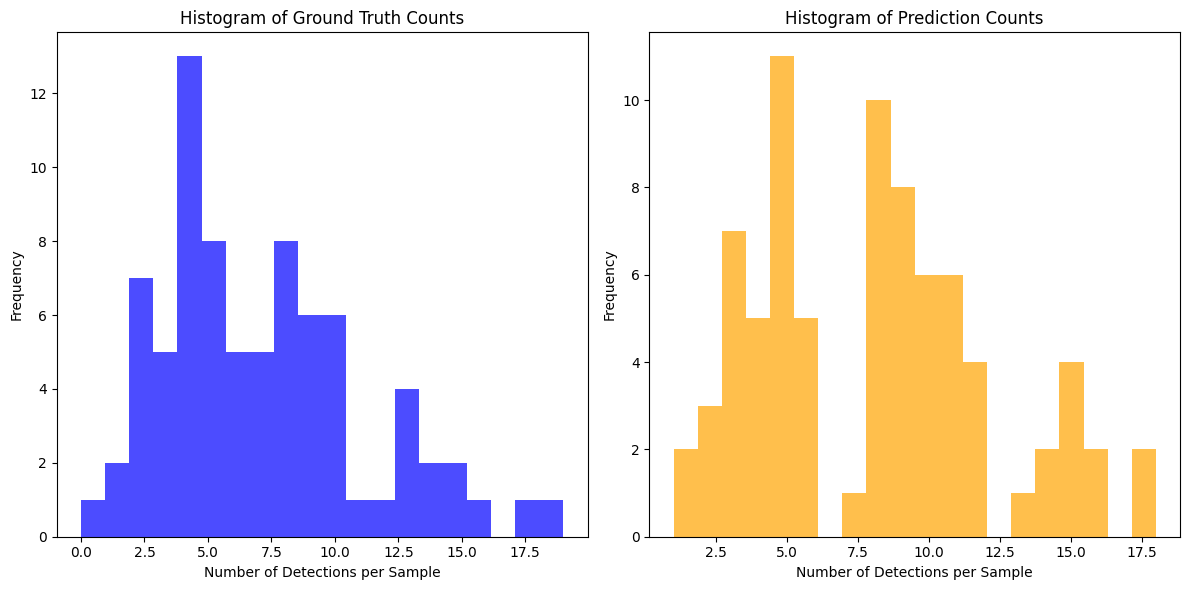

In [43]:
import matplotlib.pyplot as plt

def get_counts(detections):
    return [len(sample[detections].detections) for sample in dataset]

# Get the number of detections per sample for ground truths
ground_truth_counts = get_counts("ground_truth")

# Get the number of detections per sample for predictions
prediction_counts = get_counts("predictions")

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for ground truths
plt.subplot(1, 2, 1)
plt.hist(ground_truth_counts, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Ground Truth Counts')
plt.xlabel('Number of Detections per Sample')
plt.ylabel('Frequency')

# Histogram for predictions
plt.subplot(1, 2, 2)
plt.hist(prediction_counts, bins=20, color='orange', alpha=0.7)
plt.title('Histogram of Prediction Counts')
plt.xlabel('Number of Detections per Sample')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [61]:
import os
import cv2

from tqdm import tqdm

def count_files_and_video_duration(folder_path):
    image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
    video_extensions = ('.mp4', '.avi', '.mov', '.mkv', '.wmv')
    
    image_count = 0
    total_video_time = 0.0

    for filename in tqdm(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, filename)
        if filename.lower().endswith(image_extensions):
            image_count += 1
        elif filename.lower().endswith(video_extensions):
            video = cv2.VideoCapture(file_path)
            if video.isOpened():
                fps = video.get(cv2.CAP_PROP_FPS)
                frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT)
                duration = frame_count / fps
                total_video_time += duration

    return image_count, total_video_time

def analyze_folders(folder_paths):
    for folder in folder_paths:
        images, video_time = count_files_and_video_duration(folder)
        print(f"Folder: {folder}")
        print(f"Number of images: {images}")
        print(f"Total video time (in seconds): {video_time:.2f}")
        print()

folder_paths = [r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/28.9"]
analyze_folders(folder_paths)


100%|██████████| 10/10 [00:00<00:00, 53.47it/s]


Folder: C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/28.9
Number of images: 8
Total video time (in seconds): 471.27

